In [1]:
# Importing the dataset
dataset = read.csv('Wine.csv')
head(dataset)

Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [2]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Customer_Segment, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [3]:
# Feature Scaling
training_set[-14] = scale(training_set[-14])
test_set[-14] = scale(test_set[-14])

In [4]:
# Applying LDA. Number of features is equal to number of classes -1
library(MASS)
lda = lda(formula = Customer_Segment ~ ., data = training_set)
training_set = as.data.frame(predict(lda, training_set))
training_set = training_set[c(5, 6, 1)]
test_set = as.data.frame(predict(lda, test_set))
test_set = test_set[c(5, 6, 1)]

In [5]:
# Fitting SVM to the Training set
# install.packages('e1071')
library(e1071)
classifier = svm(formula = class ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'linear')

In [6]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

In [7]:
# Making the Confusion Matrix
table(test_set[, 3], y_pred)

   y_pred
     1  2  3
  1 12  0  0
  2  1 13  0
  3  0  0 10

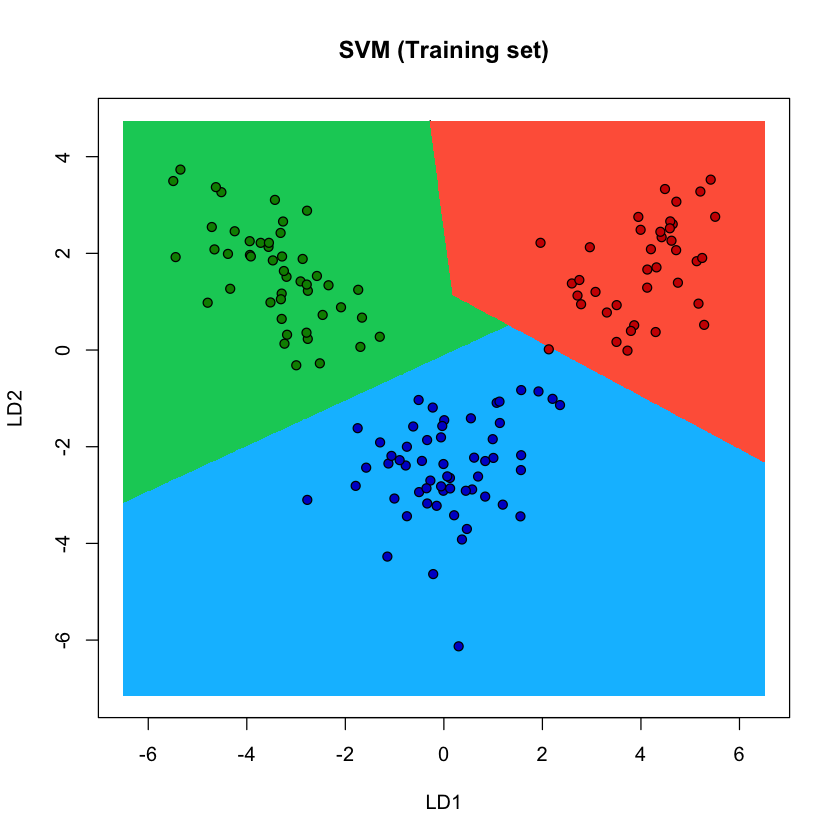

In [8]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

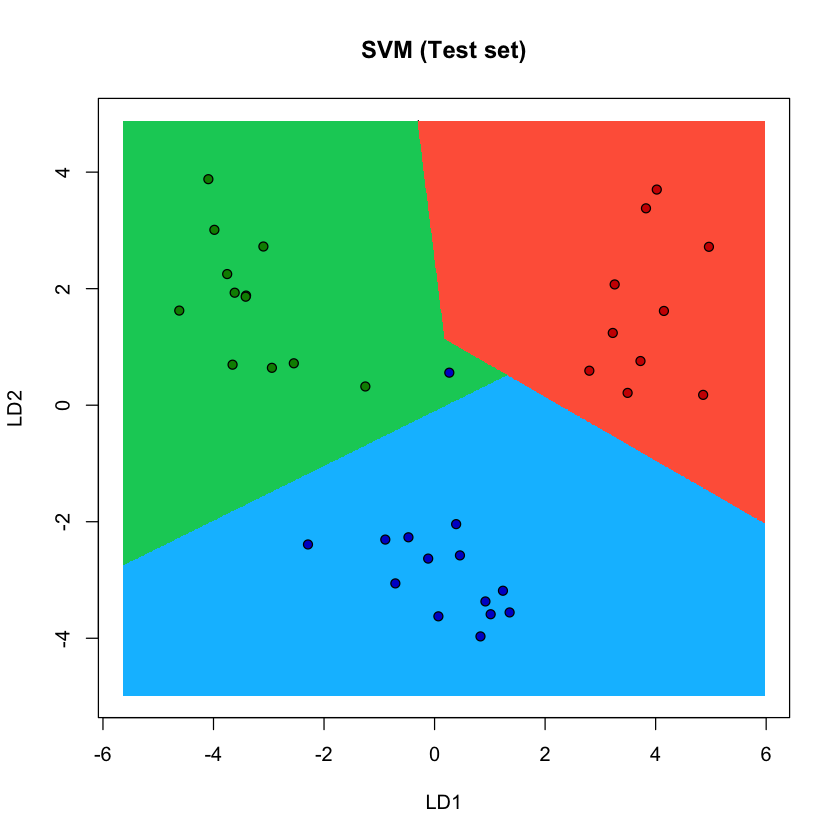

In [9]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))